In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("/Users/natanael/Desktop/proyecto-titanic/Proyecto-titanic/data/train.csv")
test = pd.read_csv("/Users/natanael/Desktop/proyecto-titanic/Proyecto-titanic/data/test.csv")

In [3]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


### EXPLORACION DE LOS DATOS

In [5]:
train.columns # que columnas tiene el dataset?

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.shape # como esta conformado el dataset (el primer valor muestra las filas y el segundo valor las columnas)

(891, 12)

In [7]:
train.info() # hay nulos en el dataset?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum() #si tiene nulos debemos saber cuantos por cada columna 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.describe() #como se distribuyen las variables numericas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train.describe(include=['O']) # vemos como se comportan las variables categoricas. 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## EDA. estudio de la variable target

In [14]:
train.groupby(['Survived']).count()['PassengerId'] # agrupamos la cantidad de sobrevivientes... 
#verificamos la cantidad que sobrevivio y la que no, recordar que son valores booleanos (0= False y 1=True)

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [15]:
train.groupby(['Survived','Sex']).count()['PassengerId'] # Ahora vemos la cantidad de sobrevivientes por sexo. 

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [17]:
group_sex = train.groupby(['Survived','Sex']).count()['PassengerId'] #Creamos una variable con la agrupacion anterior

In [19]:
group_sex.unstack(level=0) # modificamos la variable para encapsularla en un DataFrame

Survived,0,1
Sex,,
female,81,233
male,468,109


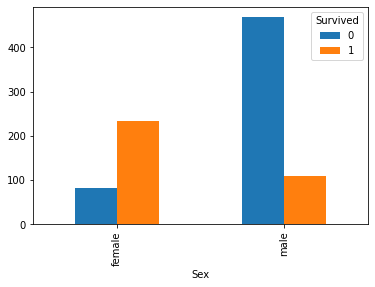

In [20]:
group_sex.unstack(level=0).plot.bar() # a la misma variable encapsulada en un DataFrame la ploteamos.
plt.show()